Pyplot tutorial
===============

This tutorial is based on the official pyplot tutorial (https://matplotlib.org/users/pyplot_tutorial.html) and other online material.

`matplotlib.pyplot` is a collection of
command style functions that make matplotlib work like MATLAB. Each
`pyplot` function makes some change to a figure: e.g., creates a figure,
creates a plotting area in a figure, plots some lines in a plotting
area, decorates the plot with labels, etc. 

Here is a first example. See below for explanations. 

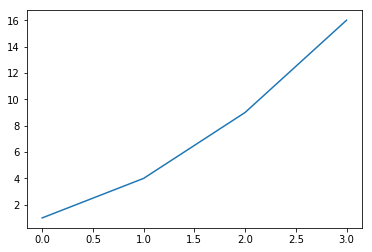

In [10]:
import matplotlib.pyplot as plt

plt.plot([1,4,9,16])
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from
1-4. If you provide a single list or array to the
`plot` command,
matplotlib assumes it is a sequence of y values, and automatically
generates the x values for you. Since python ranges start with 0, the
default x vector has the same length as y but starts with 0. Hence the x
data are `[0,1,2,3]`.
Also observe that the points are connected by straight lines. We will change this behavior next.

`plot` is a versatile
command, and will take an arbitrary number of arguments. For example, to
plot x versus y, you can issue the command:

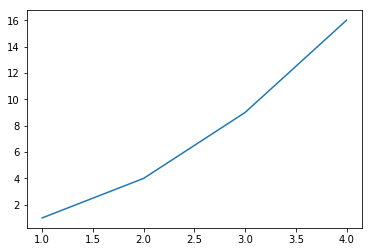

In [7]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

For every x, y pair of arguments, there is an optional third argument
which is the format string that indicates the color and line type of the
plot. The letters and symbols of the format string are from MATLAB, and
you concatenate a color string with a line style string. The default
format string is `b-`, which is a solid blue line. For example, to
plot the above with red circles, you would issue

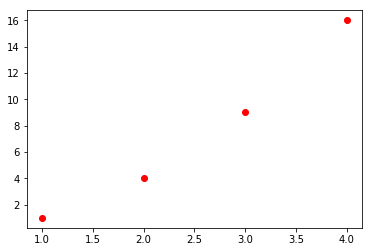

In [9]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.show()

See the `plot`
documentation for a complete list of line styles and format strings. The
`axis` command in the
example above takes a list of `[xmin, xmax, ymin, ymax]` and specifies
the viewport of the axes.

If matplotlib were limited to working with lists, it would be fairly
useless for numeric processing. Generally, you will use [numpy
\<http://www.numpy.org\>]() arrays. In fact, all sequences are converted
to numpy arrays internally. The example below illustrates a plotting
several lines with different format styles in one command using arrays.

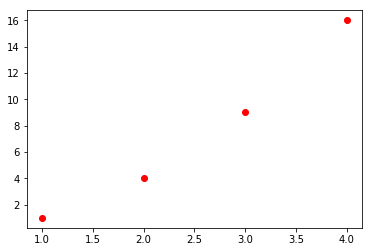

In [11]:
import numpy as np

a = np.array([[1,2,3,4],[1,4,9,16]])

plt.plot(a[0], a[1], 'ro')
plt.show()

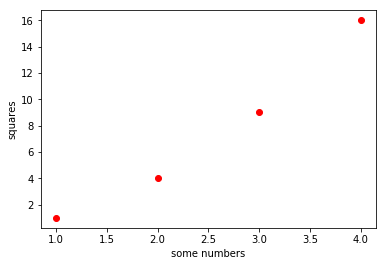

In [14]:
# adding axis labels
plt.xlabel('some numbers')
plt.ylabel('squares')

plt.plot(a[0], a[1], 'ro')
plt.show()

The `axis()` command takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.

plotting multiple lines
--------------------------------------

Below are two script to
create three lines on a single plot.
They produce exactly the same result.

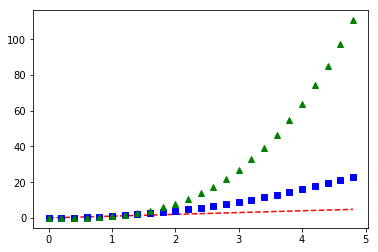

In [27]:
# evenly sampled time from 0 to 5 at 0.2s intervals
t = np.arange(0, 5, 0.2)

# red dashes, blue squares and green triangles
# first line: red dashes, t vs t (itself)
# second line: blue squares, t vs t^2 
# third line: green triangles, t vs t^3
plt.plot(t, t, 'r--',    t, t**2, 'bs',    t, t**3, 'g^')
plt.show()

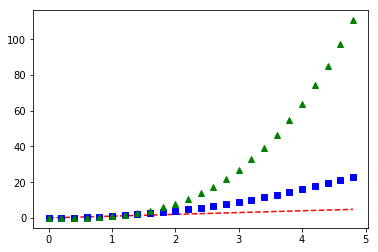

In [28]:
# evenly sampled time from 0 to 5 at 0.2s intervals
t = np.arange(0, 5, 0.2)

# red dashes, blue squares and green triangles
# first line: red dashes, t vs t (itself)
# second line: blue squares, t vs t^2 
# third line: green triangles, t vs t^3
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

Subplots
--------------------------------------

Below are two scripts to
create three subplots. See the text below them for explanations.

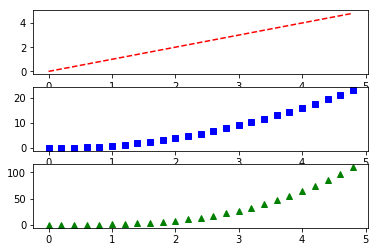

In [34]:
plt.subplot(311)
plt.plot(t, t, 'r--')

plt.subplot(312)
plt.plot(t, t**2, 'bs')

plt.subplot(313)
plt.plot(t, t**3, 'g^')

plt.show()

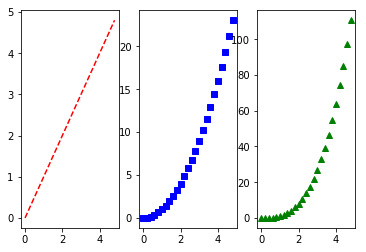

In [35]:
plt.subplot(131)
plt.plot(t, t, 'r--')

plt.subplot(132)
plt.plot(t, t**2, 'bs')

plt.subplot(133)
plt.plot(t, t**3, 'g^')

plt.show()

The `subplot` command specifies `numrows, numcols, fignum` where `fignum`
ranges from 1 to `numrows*numcols`. The commas in the `subplot` command
are optional if `numrows*numcols<10`. So `subplot(211)` is identical to
`subplot(2, 1, 1)`. You can create an arbitrary number of subplots.

Histogram example
-----------

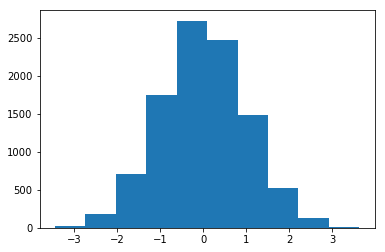

In [75]:
# let's generate some data
x = np.random.randn(10000)

plt.hist(x)
plt.show()

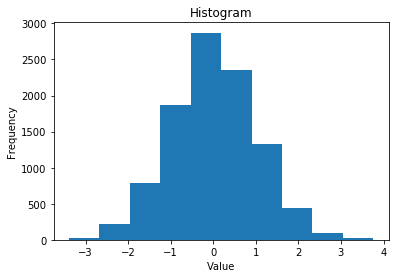

In [76]:
#same example with more info

# let's generate some data
x = np.random.randn(10000)

plt.hist(x)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Boxplot examples
--

The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.
See: https://www.statcan.gc.ca/edu/power-pouvoir/ch12/5214889-eng.htm
https://www.statcan.gc.ca/edu/power-pouvoir/ch12/5214890-eng.htm#ex2
https://www.statcan.gc.ca/edu/power-pouvoir/ch12/exer/5214875-eng.htm

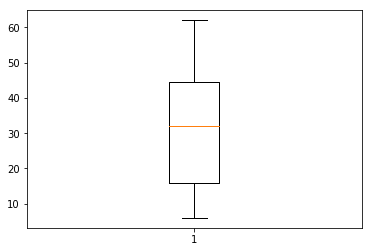

In [79]:
# let's generate some data
x = np.array([51, 17, 25, 39, 7, 49, 62, 41, 20, 6, 43, 13])

plt.boxplot(x)
plt.show()

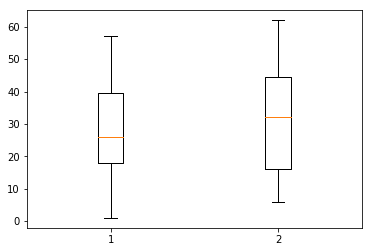

In [89]:
# multiple boxplots
# let's create some data
x = np.array([[34, 47, 1, 15, 57, 24, 20, 11, 19, 50, 28, 37], [51, 17, 25, 39, 7, 49, 62, 41, 20, 6, 43, 13]])

plt.boxplot(x.tolist())
plt.show()

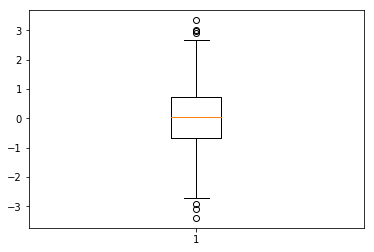

In [99]:
# outliers
x = np.random.randn(1000)

plt.boxplot(x)
plt.show()

The points beyond the whiskers are called `outliers`.

From the documentation (https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html) we have:

*whis* : float, sequence, or string (default = 1.5) 

As a float, determines the reach of the whiskers to the beyond the first and third quartiles. In other words, where IQR is the interquartile range (Q3-Q1), the upper whisker will extend to last datum less than Q3 + whis`*`IQR). Similarly, the lower whisker will extend to the first datum greater than Q1 - whis`*`IQR. Beyond the whiskers, data are considered outliers and are plotted as individual points. Set this to an unreasonably high value to force the whiskers to show the min and max values. Alternatively, set this to an ascending sequence of percentile (e.g., [5, 95]) to set the whiskers at specific percentiles of the data. Finally, whis can be the string 'range' to force the whiskers to the min and max of the data.

Let's try another example, where the whiskers are guaranteed to show the min and max values and no point is considered outlier.

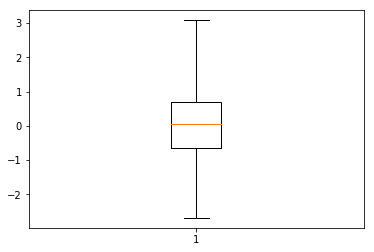

In [100]:
# outliers
x = np.random.randn(1000)

plt.boxplot(x, whis='range')
plt.show()

Barchart examples
--

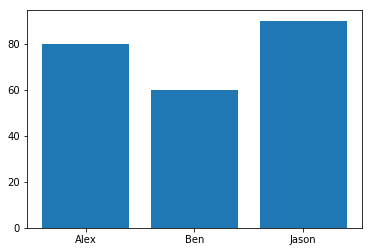

In [65]:
D = {'Alex':80, 'Ben': 60, 'Jason':90}

plt.bar(range(len(D)), list(D.values()))
plt.xticks(range(len(D)), list(D.keys()))

plt.show()

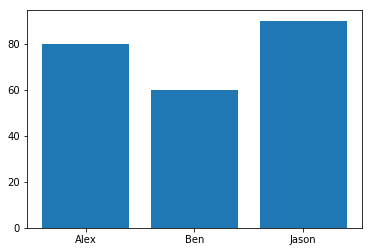

In [68]:
x = ['Alex', 'Ben', 'Jason']
course = [80, 60, 90] 

plt.bar(range(len(x)), course)
plt.xticks(range(len(x)), x)

plt.show()

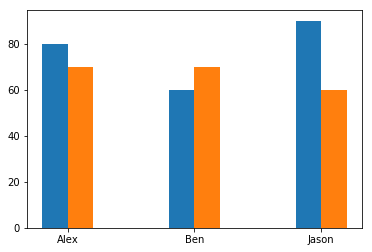

In [67]:
x = ['Alex', 'Ben', 'Jason']
course1 = [80, 60, 90] 
course2 = [70, 70, 60]

a = np.array(range(len(x)))

plt.bar(a-0.2, course1, width=0.2)
plt.bar(a, course2, width=0.2)

plt.xticks(a-0.1, x)

plt.show()